<a href="https://colab.research.google.com/github/mikeysforte/NYU-IEP-2022-3-Classroom-Assignment1--mikeysforte-/blob/main/Michael_Forte_Checkpoint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


#Checkpoint 1: simulate a pendulum with constant damping

#Look back at Simulation 1 from last semester

***If you feel confident, you can skip over this reading - it doesn't contain anything you didn't learn last semester***

We learned how to use the Scipy function [solve ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) 

Solve ivp stands for solve initial value problem; you give it a differential equation and the initial values (e.g. of position and velocity) and it finds all future values

From the documentation: This function numerically integrates a system of ordinary differential equations given an initial value:

$\frac{d \vec{y}}{d t} = f(t,\vec{y})$

$\vec{y}(t_{init}) = \vec{y}_{init}$

Here I've written $y$ as a vector, $\vec{y}$ to emphasize that there may be more than one y value in the solution. $t_{init}$ is the initial time, which is usually 0, but doesn't have to be. 

We learned that it's better to work with non-dimensional units when doing numeric simulations. So we first turned the linearized pendulum equation

$\frac{d^2 x}{d t^2} = -\frac{g}{L} x = -\omega^2 x$

into a non-dimensional form

$\frac{d^2 x}{d s^2} = - x, s = \omega t$



Although the documentation uses $t$ for time, I'm going to use $s$, to keep track of the fact that we'll make time non-dimensional ($s = \omega t$) before we plug it into the solver.


To use ```solve_ivp``` to integrate the pendulum equation, we turned the *second order* differential equation $\frac{d^2 x}{d s^2} = - x, s = \omega t$ into a system of *first order* differential equations.
uations

$\frac{d x}{d s} = u(s)$

$\frac{d u}{d s} = - x(s)$

$x(s_{init}) = x_{init}$

$u(s_{init}) = u_{init}$ 


We then wrote this system in vector form

$\vec{y}(s) = (x(s),u(s))$

$\vec{y}_{init} = (x_{init},u_{init})$

$\frac{d \vec{y}}{d s} = (\frac{d x}{d s}, \frac{d u}{d s}) = (u(s),-x(s)) = (y_1(s), -y_0(s))$


```solve_ivp``` solves the system: $\frac{d \vec{y}}{d s} = f(s,\vec{y})$

For the pendulum equation, then, $f(s,\vec{y}) = (y_1(s), -y_0(s))$

Note that even though $s$ appears on the left side, it doesn't appear by itself on the right. This is because our specific equations of motion don't have explicit time dependence. An example where $s$ would appear on the right is if we were applying a periodic force by pushing the pendulum at particular times (we won't do that yet!). **Even if your derivative function doesn't use s, you have to include both arguments in the function definition**

####Mapping between math notation and python notation

In math, we write $\vec{y}(s) = (y_0(s), y_1(s))$ to indicate we have two components of the vector $\vec{y}$, each of which depends on s. Sometimes we write $\vec{y} = (y_0, y_1)$, and the s-dependece is understood. When we turn this into python notation, the $(s)$ is always understood, and we write the first component as ```y[0]``` and the second component as ```y[1]```

Math: $f(s,\vec{y}) = (y_1, -y_0)$ becomes Python: ``` pendulum_derivative_function (s,y): return (y[1],-y[0])```

At a minimum solve ivp takes 3 inputs and returns an output "bunch object" which just basically stores all the parts of the answer by name:


```
sol = solve_ivp(fun, t_span, y0)
#fun is the derivative function dydt = fun(t,y)
#t_span is (initial_time, final_time)
#y0 is the initial condition

#sol.t has the time value
#sol.y has the solution
plt.plot(sol.t, sol.y[0]) #would plot position vs. time, if y[0] represents position
```

By default, the solver spaces the output time points too far apart to make a nice plot. How do we fix this? By telling the solver exactly when we want the output.
From the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), we find the optional parameter: 

**t_eval : array_like or None, optional**

Times at which to store the computed solution, must be sorted and lie within t_span. If None (default), use points selected by the solver.


Below is a minimum working example that plots position vs. s for a pendulum with an initial amplitude of 0.1 m. 


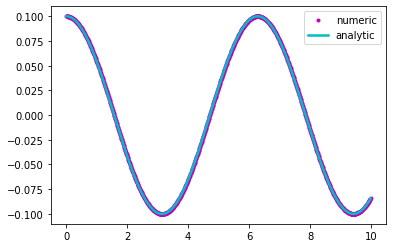

In [ ]:
def oscillatorDerivative (s,y): 
  return (y[1],-y[0]) #y[0] = position, y[1] = velocity;

y0 = (0.1,0) #initial position = 1, initial velocity = 0 - should look like a cosine
t_span = (0,10) #go from s = 0 to s = 10
ds = 0.01 #output solution every 0.01 radians (0.01/omega seconds)

sol = solve_ivp(oscillatorDerivative, t_span, y0, t_eval = np.arange(t_span[0],t_span[1],ds))

plt.plot(sol.t, sol.y[0], 'm.', sol.t, y0[0]*np.cos(sol.t), 'c-',linewidth=2.5) #note that even though we call time "s", python stores time in sol.t

plt.legend(('numeric','analytic'));

### QUESTION 1: Simulate the undamped pendulum and calculate its energies

Convince yourself that if $x$ is measured in meters, $m$ is measured in kg, $\omega$ is measured in $s^{-1}$, $s = \omega t$, $u = \frac{d x}{d s} = \omega \frac{d x}{d t}$, then the Potential (PE) and Kinetic (KE) energies are given by

$PE = \frac{1}{2} m \omega ^2 x^2$

$KE = \frac{1}{2} m \omega ^2 u^2$

1. Please simulate the motion of a pendulum with mass 0.5 kg and length 1 meter released at t = 0 from an initial displacement of 0.1 meters at 0 velocity, over a time range of 0 to 10 seconds. Have ```solve_ivp``` calculate the solution in increments of 0.05 seconds over the time range 0 to 10 seconds in increments of 0.05 seconds. *Hint: note that I calculated $\omega$ and convered the time range and dt into units of $s = \omega t$ for you below*
1. Please plot the displacement of the bob vs. time over the time range 0 to 10 seconds in increments of 0.05 seconds. *Remember that `sol.t` contains $s$, so $t = $ `sol.t / omega`*
1. On a new graph, please plot the Kinetic Energy, Potential Energy, and total energy as a function of time over the time range 0 to 10 seconds in increments of 0.05 seconds. *Hint: when calculating the kinetic energy, remember that u is stored in `sol.y[1]`*

#Add damping to the simulation

When we introduce a drag force

$\frac{d^2 x}{d t^2} = -\frac{g}{L} x - \frac{B}{m} \frac{d x}{d t}$

$s = \omega t$

$\frac{d^2 x}{d s^2} = -x - \frac{B}{m \omega} \frac{d x}{d s}$

or as a system of equations: 
$\frac{d x}{d s} = u(s)$

$\frac{d u}{d s} = - x(s) - \frac{B}{m \omega} u(s)$

Translating the system into a vector:

$\vec{y}(s) = (x(s),u(s))$

$\frac{d \vec{y}}{d s} = (y_1(s), -y_0(s) - \frac{B}{m \omega} y_1(s))$

Using the definition $Q = \frac{m \omega}{B}$, we get the final form:

$\frac{d \vec{y}}{d s} = (y_1(s), -y_0(s) - y_1(s)/Q)$


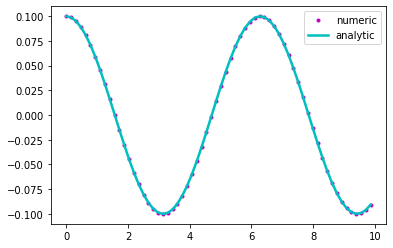

In [16]:
g = 9.8
L = 1
m = 0.5
a = 0.1
omega = np.sqrt(g/L)
t_span = np.array((0,10))
s_span = omega*t_span
dt = 0.05
ds = omega*dt

##your code here
def oscillatorDerivative (s,y): 
  return (y[1],-y[0]) #y[0] = position, y[1] = velocity;

y0 = (0.1,0) #initial position = .1, initial velocity = 0 - should look like a cosine
sol = solve_ivp(oscillatorDerivative, t_span, y0, t_eval = np.arange(t_span[0],t_span[1],ds))
plt.plot(sol.t, sol.y[0], 'm.', sol.t, y0[0]*np.cos(sol.t), 'c-',linewidth=2.5) #note that even though we call time "s", python stores time in sol.t
plt.legend(('numeric','analytic'));





##Question 2: Write down the derivative function for a damped oscillator
modifiy oscillatorDerivative
```
def oscillatorDerivative (s,y): 
  return (y[1],-y[0]) #y[0] = position, y[1] = velocity;
```
to take an additional argument and include damping:
```
def dampedOscillatorDerivative (s,y,Q): 
  return ....
```

**hint hint hint: Quick Bite 3**

you can write the function in 1 line or in multiple lines, as you prefer 

In [ ]:
def dampedOscillatorDerivative (s,y,Q):
  return (y[1], -y[0] -y[1]/Q) #y[0] = position, y[1] = velocity y[Q] = damping effect;

##Question 3: Integrate the damped oscillator for a particular pendulum

1. Please simulate the motion of a damped pendulum with mass 0.5 kg and length 1 meter released at t = 0 from an initial displacement of 0.1 meters at 0 velocity, over a time range of 0 to 20 seconds, with **Q = 10**. Have ```solve_ivp``` calculate the solution in increments of 0.05 seconds over the time range 0 to 10 seconds in increments of 0.05 seconds. *Hint: calculate $\omega$ and convert the time range and dt into units of $s = \omega t$*
1. Please plot the displacement of the bob vs. time over the time range 0 to 60 seconds in increments of 0.05 seconds. *Remember that `sol.t` contains $s$, so $t = $ `sol.t / omega`*
1. On a new graph, please plot the Kinetic Energy, Potential Energy, and total energy as a function of time over the time range 0 to 60 seconds in increments of 0.05 seconds. *Hint: when calculating the kinetic energy, remember that u is stored in `sol.y[1]`*

###Note: passing extra arguments to ```solve_ivp```

There are two ways to tell ```solve_ivp``` about Q. 
1. Use a 'lambda' function (a short anonymous function) to 'wrap' the derivative function
```
sol = solve_ivp(lambda s,y: dampedOscillatorDerivative(s,y,Q), ...
```
1. Use the `args` optional keyword argument to tell `solve_ivp` the derivative function takes extra arguments
```
sol = solve_ivp(dampedOscillatorDerivative, ..., ..., args = (Q,)
```
  **the comma after Q is important!** `args` is a list of arguments (in case there are more than one) and you need the comma to make it a list `(10)` is not a list, but `(10,)` is.

For both approaches, replace `Q` with the particular value of Q you want to simulate: e.g. `args = (10,)` for Q = 10



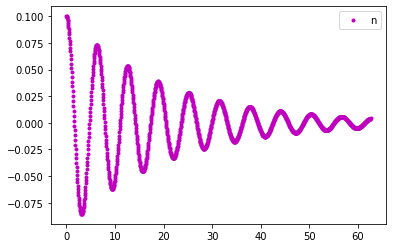

In [15]:
##your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dampedOscillatorDerivative (s,y,Q):
  return (y[1], -y[0] -y[1]/Q) #y[0] = position, y[1] = velocity y[Q] = damping effect;

g = 9.8
L = 1
m = 0.5
a = 0.1
Q = 10
omega = np.sqrt(g/L)
t_span = np.array((0,20))
s_span = np.sqrt(g/L)*t_span
dt = 0.05
ds = omega*dt

y0 = (0.1,0) #initial position = .1, initial velocity = 0 - should look like a cosine
t_span = (0,20) #go from s = 0 to s = 10
ds = 0.05 #output solution every 0.01 radians (0.05/omega seconds)

sol = solve_ivp(dampedOscillatorDerivative, s_span, y0, t_eval = np.arange(s_span[0],s_span[1],ds), args = (Q,))
plt.plot(sol.t, sol.y[0], 'm.') #note that even though we call time "s", python stores time in sol.t
plt.legend(('numeric'));


## Question 4: Find the lifetime and verify the relation $Q = \omega \tau$

---



If the energy approximately obeys the relation: $U = U(0) e^{-t/\tau}$, then 

$\ln(U) = \ln(U(0)) - \frac{t}{\tau}$

For each of Q = 10,20,and 100, 
1. Solve the damped oscillator from $s = 0$ to $s = 6 Q$ in steps of ds = 0.1 (e.g. for Q = 20, from 0 to 120 in steps of 0.1), with an initial value of $x = 1$ and $u = 0$. 
1. Calculate the total energy in non-dimensional units $U = \frac{1}{2}x^2 + \frac{1}{2} u^2$
1. Fit the **natural log of the energy ($\ln(U)$)** vs. $s$ (`sol.t`) to a line using `np.polyfit`
1. Plot the natural log of the energy vs time (s) along with your fit line. Use a separate plot for each Q
1. For each plot, title the plot with 'Q = (Q); tau = (-1/m)' where m is the slope of the fit line. E.g. if Q = 25 and $m = -0.02$, then the title would be 'Q = 25, tau = 50' (this would be wrong, see below)

*hints:* 
1. you can solve this problem using a for loop `for Q in (10,20,100):` and only have to write the code once. use `plt.figure()` at the beginning of the loop or `plt.show()` at the end to get a new set of axes for each Q. 
1. We are working in non-dimensionalized units (which is why I'm not telling you the mass of the bob or the length of the pendulum or any of that nonsense), so $\omega = 1$. This implies $Q = \tau$. Use this to check your answer

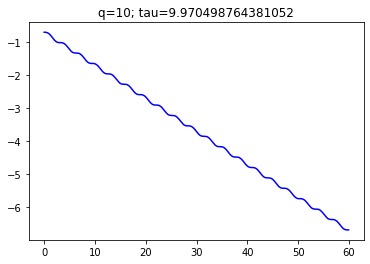

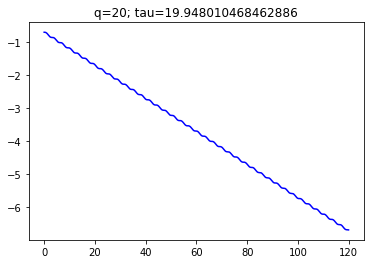

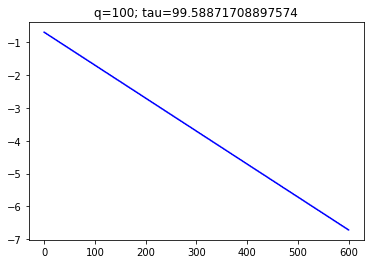

In [18]:
#your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dampedOscillatorDerivative (s,y,Q):
  return (y[1], -y[0] -y[1]/Q) #y[0] = position, y[1] = velocity y[Q] = damping effect;

g = 9.8
L = 1
m = 0.5
a = 0.1
Q = 10
omega = np.sqrt(g/L)
ds=.1
y0=(1,0)
for q in (10,20,100):

  plt.figure()
  s_span=np.array((0,6*q))
  dsol = solve_ivp(dampedOscillatorDerivative, s_span, y0, t_eval = np.arange(s_span[0], s_span[1], ds), args=(q,))

  u = .5*(dsol.y[1]**2)+ .5*(dsol.y[0]**2)

  m, b=np.polyfit(dsol.t, np.log(u), 1)
  
  plt.plot(dsol.t, np.log(u), 'b-', label = 'lnu vs s')
  plt.title('q={}; tau={}' . format(q,-1/m))
  plt.show()